```
This software is a part of GPU Ocean.

Copyright (C) 2019  SINTEF Digital

Producing plots of data-assimilation and drift trajectory forecasting 
experiments by post-processing the files produced by 
scripts/run_experiment.py

This program is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with this program.  If not, see <http://www.gnu.org/licenses/>.
```

# Post Processing of Data Assimilation experiments

## Set environment

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd 
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import animation, rc

from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.axes_grid1.colorbar import colorbar


import os
import sys
import datetime

from importlib import reload
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '../../')))

/home/florianb/miniconda3/envs/gpuocean/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid1.colorbar module was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use matplotlib.colorbar instead.
  # This is added back by InteractiveShellApp.init_path()


In [2]:
%cuda_context_handler gpu_ctx
timestamp = datetime.datetime.now().strftime("%Y_%m_%d-%H_%M_%S")

UsageError: Line magic function `%cuda_context_handler` not found.


## Specify the folder containing the results

NB - You should match the `result_dir` with the variable `main_title`

In [3]:
result_dirs = \
[os.path.abspath('/sintef/forecasting_results/da_experiment_2021_11_26-19_09_01_skillMC'),
os.path.abspath('/sintef/forecasting_results/da_experiment_2021_11_26-20_03_21_skillIEWPF'),
os.path.abspath('/sintef/forecasting_results/da_experiment_2021_11_26-22_02_50_skillLETKF')]

print(result_dirs)

#main_title = "No data assimilation"
#main_title = "Ten drifters"
#main_title = "All drifters"
main_title = "All moorings"
#main_title = "West moorings"
#main_title = "South moorings"

truth_folder = os.path.join(result_dirs[0], "truth")


['/sintef/forecasting_results/da_experiment_2021_11_26-19_09_01_skillMC', '/sintef/forecasting_results/da_experiment_2021_11_26-20_03_21_skillIEWPF', '/sintef/forecasting_results/da_experiment_2021_11_26-22_02_50_skillLETKF']


In [4]:
def file_filter(path_to_dir, ext=None, prefix=None, abspath=True):
    filtered_files = os.listdir(path_to_dir)
    if prefix:
        filtered_files = list(file for file in filtered_files if file.startswith(prefix))
    if ext:
        filtered_files = list(file for file in filtered_files if file.endswith(ext))
    if abspath:
        filtered_files= list(os.path.join(path_to_dir, file)  for file in filtered_files)

    filtered_files.sort()
    return filtered_files


In [5]:
# Read skill files

skill_files = []

for result_dir in result_dirs:
    skill_files.append(file_filter(result_dir, ext="csv", prefix="scores")[0])

In [6]:
# Retrieve skill scores and check consistency 

columns = pd.read_csv(skill_files[0], sep=" ", header=None, nrows=1)

column_names = []
for s in range(1,columns.iloc[0].shape[0]):
    column_names.append(columns.iloc[0][s])

for file in skill_files:
    check_columns = pd.read_csv(skill_files[0], sep=" ", header=None, nrows=1)

    check_column_names = []
    for s in range(1,check_columns.iloc[0].shape[0]):
        check_column_names.append(check_columns.iloc[0][s])

    if check_column_names != column_names:
        print(check_column_names, " of ", file, " dont match!!")

column_names

['bias', 'MSE', 'CRPS']

In [7]:
# load values
# TODO: load in dataframe

skills = []

for skill_file in skill_files:
    skills.append(pd.read_csv(skill_file, sep=" ", header=None, skiprows=1, names=column_names).to_numpy().T)


In [8]:
def plot_skill(score):

    try:
        score_idx = column_names.index(score)

        fig = plt.figure(figsize=(8, 6))
        plt.title(column_names[score_idx])
        plt.plot(skills[0][score_idx])
        plt.plot(skills[1][score_idx])
        plt.plot(skills[2][score_idx])
        plt.legend(["MC", "IEWPF", "LETKF"])

        plt.xticks(list(range(0,len(skills[0][0])+1,288)),["day "+str(int(i+3)) for i in range(int(len(skills[0][0])/288 + 1))])
    except:
        print("Score does not exist")

    

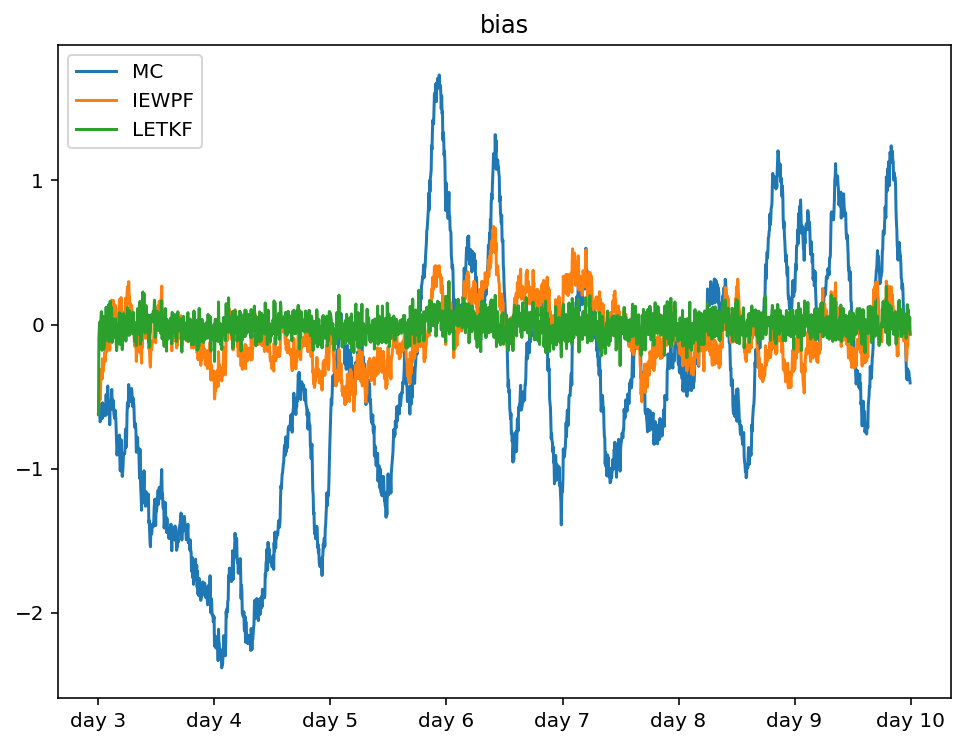

In [9]:
plot_skill("bias")

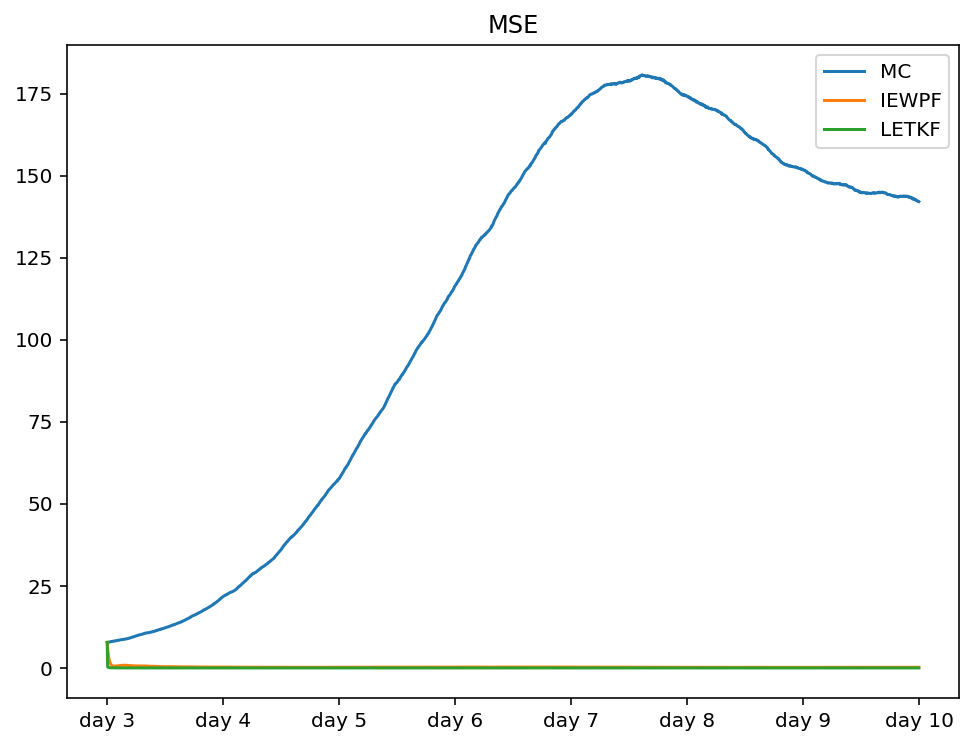

In [10]:
plot_skill("MSE")

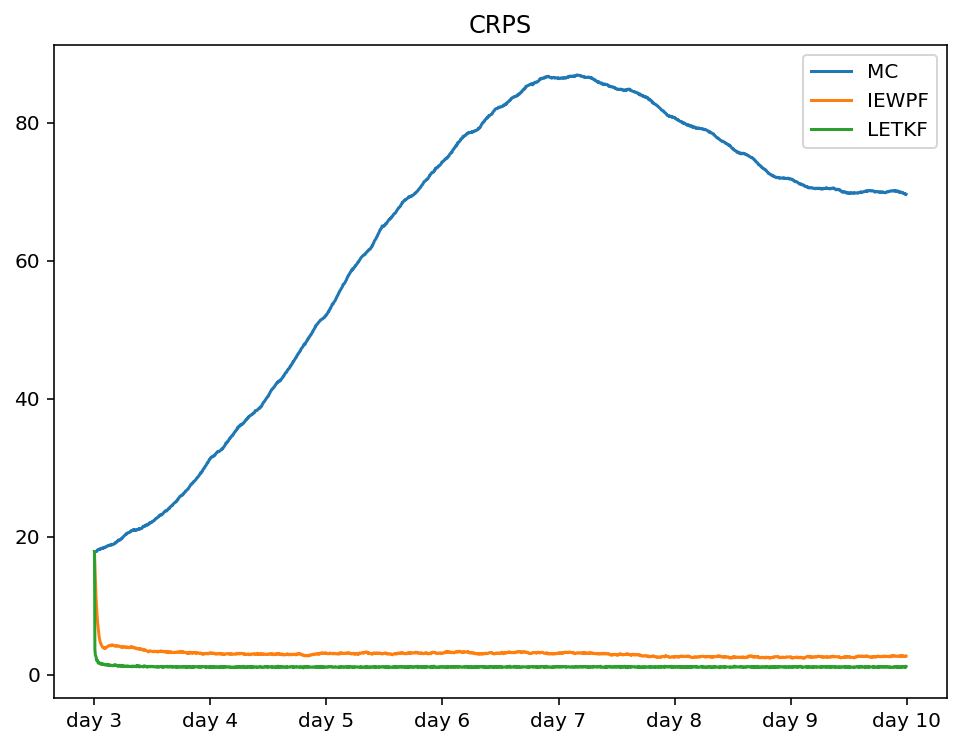

In [11]:
plot_skill("CRPS")